In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('education_career_success.csv')

In [4]:
df

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,26,Female,2.44,1258,776,2.44,Arts,3,7,3,8,5,5,31500.0,9,5,Mid,7,No
4996,S04997,18,Female,3.94,1032,923,3.73,Law,0,9,3,6,4,5,41800.0,9,2,Entry,4,No
4997,S04998,19,Female,3.45,1299,720,2.52,Law,3,5,5,6,2,2,49500.0,2,5,Mid,6,No
4998,S04999,19,Male,2.70,1038,319,3.94,Law,1,4,5,5,1,5,54700.0,9,4,Entry,6,No


In [6]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'High_School_GPA', 'SAT_Score',
       'University_Ranking', 'University_GPA', 'Field_of_Study',
       'Internships_Completed', 'Projects_Completed', 'Certifications',
       'Soft_Skills_Score', 'Networking_Score', 'Job_Offers',
       'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion',
       'Current_Job_Level', 'Work_Life_Balance', 'Entrepreneurship'],
      dtype='object')

In [7]:
df.isna().sum()

Student_ID               0
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
Entrepreneurship         0
dtype: int64

In [8]:
df.dtypes

Student_ID                object
Age                        int64
Gender                    object
High_School_GPA          float64
SAT_Score                  int64
University_Ranking         int64
University_GPA           float64
Field_of_Study            object
Internships_Completed      int64
Projects_Completed         int64
Certifications             int64
Soft_Skills_Score          int64
Networking_Score           int64
Job_Offers                 int64
Starting_Salary          float64
Career_Satisfaction        int64
Years_to_Promotion         int64
Current_Job_Level         object
Work_Life_Balance          int64
Entrepreneurship          object
dtype: object

## Data Pre-Processing

In [ ]:
# non numeric columns
df.select_dtypes(exclude=['number'])

,Student_ID,Gender,Field_of_Study,Current_Job_Level,Entrepreneurship
0,S00001,Male,Arts,Entry,No
1,S00002,Other,Law,Mid,No
2,S00003,Female,Medicine,Entry,No
3,S00004,Male,Computer Science,Mid,No
4,S00005,Male,Engineering,Entry,No
...,...,...,...,...,...
4995,S04996,Female,Arts,Mid,No
4996,S04997,Female,Law,Entry,No
4997,S04998,Female,Law,Mid,No
4998,S04999,Male,Law,Entry,No


In [11]:
df['Entrepreneurship'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df['Entrepreneurship'] = df['Entrepreneurship'].apply(lambda x: 1 if x=='Yes' else 0)

In [15]:
df['Current_Job_Level'].unique()

array(['Entry', 'Mid', 'Senior', 'Executive'], dtype=object)

In [16]:
def filter_job_level(job):
    if job == 'Entry':
        return 1
    if job == 'Mid':
        return 2
    if job == 'Senior':
        return 3
    if job == 'Executive':
        return 4

In [17]:
df['Filter_Job_Level'] = df['Current_Job_Level'].apply(filter_job_level)

## Exploratory Data Analysis

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'High_School_GPA', 'SAT_Score',
       'University_Ranking', 'University_GPA', 'Field_of_Study',
       'Internships_Completed', 'Projects_Completed', 'Certifications',
       'Soft_Skills_Score', 'Networking_Score', 'Job_Offers',
       'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion',
       'Current_Job_Level', 'Work_Life_Balance', 'Entrepreneurship',
       'Filter_Job_Level'],
      dtype='object')

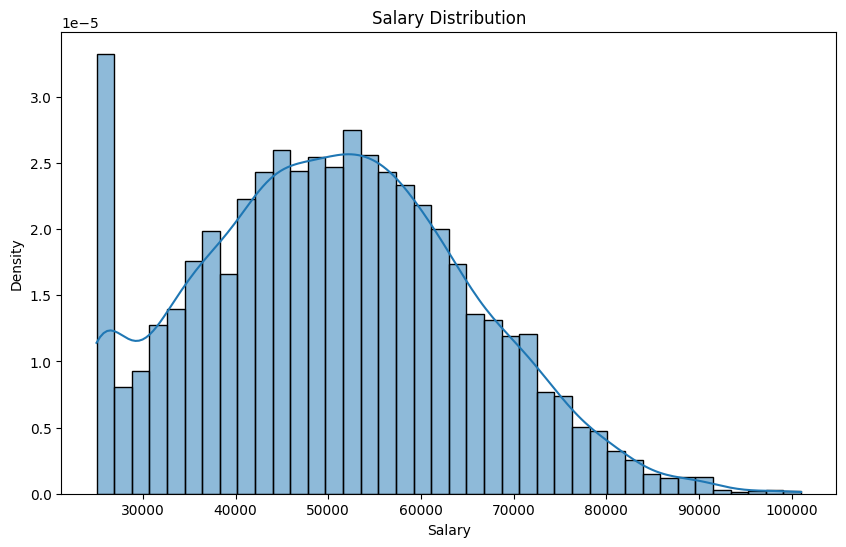

In [56]:
# PDf of Starting Salary
plt.figure(figsize = (10, 6))

sns.histplot(df['Starting_Salary'], bins = 40, kde = True, stat = 'density')

plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Salary Distribution')

plt.show()

In [75]:
df.groupby('Gender')[['High_School_GPA','University_GPA']].mean()

,High_School_GPA,University_GPA
Gender,,
Female,2.998191,3.027332
Male,3.000443,3.008405
Other,2.937760,3.079427


In [76]:
df['Field_of_Study'].unique()

array(['Arts', 'Law', 'Medicine', 'Computer Science', 'Engineering',
       'Business', 'Mathematics'], dtype=object)

In [ ]:
df.columns

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,...,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship,Filter_Job_Level
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,...,9,8,5,27200.0,4,5,Entry,7,0,1
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,...,8,1,4,25000.0,1,1,Mid,7,0,2
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,...,1,9,0,42400.0,9,3,Entry,7,0,1
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,...,10,6,1,57400.0,7,5,Mid,5,0,2
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,...,10,9,4,47600.0,9,5,Entry,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,26,Female,2.44,1258,776,2.44,Arts,3,7,...,8,5,5,31500.0,9,5,Mid,7,0,2
4996,S04997,18,Female,3.94,1032,923,3.73,Law,0,9,...,6,4,5,41800.0,9,2,Entry,4,0,1
4997,S04998,19,Female,3.45,1299,720,2.52,Law,3,5,...,6,2,2,49500.0,2,5,Mid,6,0,2
4998,S04999,19,Male,2.70,1038,319,3.94,Law,1,4,...,5,1,5,54700.0,9,4,Entry,6,0,1


ideas:
* does gender affect gpa
* does gpa affect starting salary 
* does gender affect starting salary
* does field of study affect starting salary or gpa
* career satisfication compared to salary
* does salary affect work life balance

* how does gpa, number of internships, networking influence affect job offers and salaries (some regression)
* does university ranking affect job offers (Is it worth it to go to a top university?)
* likelihood that you get a job based on your stats (if you have a low gpa but high number of internships, what is your chances of getting a job?)